In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

https://nbviewer.org/github/amaiya/ktrain/blob/master/tutorials/tutorial-A3-hugging_face_transformers.ipynb

In [ ]:
from spacy import displacy
from spacy.tokens import Doc
from spacy.lang.en import English
from spacy.tokens import Span
nlp = English()

In [ ]:
! ls /kaggle/input/ktrain-library/ktrain

In [ ]:
! ls /kaggle/input/tokenizations-february2022/pytokenizations/

In [ ]:
!pip install pytokenizations --no-index --find-links=file:///kaggle/input//tokenizations-february2022/pytokenizations

In [ ]:
!pip install pytokenizations --no-index --find-links=file:///kaggle/input//tokenizations-february2022

In [ ]:
import random 

def get_entity_options(random_colors=True):
    """
    generating color options for visualizing the named entities
    """
    def color_generator(number_of_colors):
        color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
        return color

    entities = ['I-NBME516', 'B-NBME509', 'I-NBME904', 'I-NBME5', 'I-NBME102', 'B-NBME304', 'I-NBME514', 'B-NBME7', 'B-NBME405', 'B-NBME610', 'B-NBME702', 'I-NBME303', 'B-NBME703', 'B-NBME801', 'B-NBME308', 'I-NBME2', 'B-NBME104', 'I-NBME4', 'I-NBME403', 'I-NBME604', 'B-NBME207', 'B-NBME609', 'I-NBME203', 'B-NBME110', 'B-NBME406', 'B-NBME108', 'B-NBME400', 'I-NBME817', 'I-NBME305', 'I-NBME801', 'B-NBME813', 'I-NBME816', 'I-NBME901', 'I-NBME404', 'B-NBME908', 'I-NBME517', 'I-NBME8', 'B-NBME12', 'B-NBME214', 'B-NBME901', 'I-NBME408', 'I-NBME811', 'B-NBME507', 'B-NBME4', 'I-NBME7', 'I-NBME313', 'B-NBME506', 'I-NBME600', 'I-NBME602', 'B-NBME205', 'I-NBME804', 'I-NBME504', 'B-NBME606', 'O', 'I-NBME806', 'B-NBME900', 'I-NBME503', 'I-NBME11', 'I-NBME704', 'B-NBME705', 'B-NBME103', 'B-NBME804', 'B-NBME706', 'B-NBME517', 'I-NBME900', 'B-NBME906', 'I-NBME607', 'B-NBME909', 'I-NBME701', 'B-NBME3', 'B-NBME803', 'I-NBME902', 'B-NBME407', 'B-NBME203', 'I-NBME609', 'B-NBME501', 'B-NBME302', 'B-NBME216', 'I-NBME3', 'I-NBME6', 'B-NBME212', 'B-NBME516', 'I-NBME513', 'I-NBME508', 'B-NBME102', 'I-NBME500', 'I-NBME304', 'I-NBME101', 'B-NBME511', 'I-NBME605', 'I-NBME207', 'I-NBME214', 'I-NBME505', 'I-NBME406', 'B-NBME810', 'I-NBME809', 'B-NBME112', 'I-NBME703', 'B-NBME111', 'I-NBME109', 'I-NBME314', 'I-NBME107', 'B-NBME401', 'B-NBME504', 'I-NBME309', 'I-NBME306', 'I-NBME610', 'B-NBME204', 'B-NBME600', 'I-NBME405', 'B-NBME602', 'B-NBME916', 'I-NBME400', 'B-NBME106', 'B-NBME101', 'B-NBME206', 'B-NBME505', 'B-NBME604', 'I-NBME608', 'B-NBME6', 'B-NBME408', 'B-NBME913', 'I-NBME510', 'B-NBME812', 'I-NBME910', 'B-NBME912', 'B-NBME608', 'I-NBME205', 'B-NBME905', 'B-NBME611', 'I-NBME108', 'I-NBME803', 'B-NBME202', 'I-NBME301', 'B-NBME514', 'B-NBME603', 'B-NBME808', 'B-NBME902', 'B-NBME402', 'B-NBME109', 'B-NBME213', 'B-NBME814', 'B-NBME209', 'I-NBME409', 'B-NBME0', 'I-NBME302', 'I-NBME111', 'I-NBME506', 'B-NBME10', 'B-NBME200', 'I-NBME401', 'I-NBME1', 'I-NBME502', 'B-NBME815', 'B-NBME210', 'B-NBME107', 'B-NBME314', 'I-NBME209', 'B-NBME500', 'I-NBME810', 'B-NBME904', 'I-NBME805', 'I-NBME916', 'I-NBME100', 'B-NBME301', 'I-NBME312', 'I-NBME106', 'I-NBME705', 'B-NBME806', 'I-NBME300', 'B-NBME811', 'B-NBME914', 'B-NBME605', 'I-NBME0', 'I-NBME606', 'B-NBME305', 'I-NBME812', 'B-NBME701', 'B-NBME201', 'I-NBME509', 'B-NBME1', 'I-NBME603', 'B-NBME817', 'I-NBME708', 'I-NBME201', 'I-NBME310', 'I-NBME815', 'B-NBME9', 'I-NBME110', 'B-NBME503', 'I-NBME702', 'B-NBME211', 'I-NBME402', 'B-NBME309', 'I-NBME210', 'I-NBME511', 'B-NBME303', 'I-NBME611', 'I-NBME200', 'I-NBME212', 'I-NBME105', 'B-NBME313', 'I-NBME9', 'B-NBME409', 'B-NBME513', 'B-NBME802', 'B-NBME5', 'I-NBME103', 'I-NBME216', 'B-NBME607', 'B-NBME100', 'B-NBME707', 'I-NBME206', 'I-NBME315', 'B-NBME816', 'B-NBME508', 'B-NBME311', 'B-NBME903', 'I-NBME808', 'B-NBME800', 'I-NBME202', 'B-NBME307', 'B-NBME708', 'B-NBME306', 'I-NBME104', 'B-NBME215', 'B-NBME310', 'I-NBME814', 'B-NBME300', 'B-NBME8', 'B-NBME403', 'B-NBME510', 'B-NBME805', 'I-NBME213', 'I-NBME800', 'B-NBME404', 'I-NBME211', 'B-NBME2', 'I-NBME706', 'I-NBME215', 'B-NBME910', 'I-NBME707', 'B-NBME809', 'B-NBME502', 'B-NBME312', 'I-NBME813', 'B-NBME105', 'I-NBME204', 'I-NBME307', 'B-NBME700', 'B-NBME315', 'B-NBME11', 'I-NBME507', 'B-NBME601', 'I-NBME311', 'B-NBME704', 'B-NBME208', 'I-NBME10']
    
    colors = {"ENT":"#E8DAEF"}
    
    if random_colors:
        color = color_generator(len(entities))
        for i in range(len(entities)):
            colors[entities[i]] = color[i]
#     else:
#         entities_cat_1 = {"GGP":"#F9E79F", "SO":"#F7DC6F", "TAXON":"#F4D03F", "CHEBI":"#FAD7A0", "GO":"#F8C471", "CL":"#F5B041"}
#         entities_cat_2 = {"DNA":"#82E0AA", "CELL_TYPE":"#AED6F1", "CELL_LINE":"#E8DAEF", "RNA":"#82E0AA", "PROTEIN":"#82E0AA"}
#         entities_cat_3 = {"DISEASE":"#D7BDE2", "CHEMICAL":"#D2B4DE"}
#         entities_cat_4 = {"CANCER":"#ABEBC6", "ORGAN":"#82E0AA", "TISSUE":"#A9DFBF", "ORGANISM":"#A2D9CE", "CELL":"#76D7C4", "AMINO_ACID":"#85C1E9", "GENE_OR_GENE_PRODUCT":"#AED6F1", "SIMPLE_CHEMICAL":"#76D7C4", "ANATOMICAL_SYSTEM":"#82E0AA", "IMMATERIAL_ANATOMICAL_ENTITY":"#A2D9CE", "MULTI-TISSUE_STRUCTURE":"#85C1E9", "DEVELOPING_ANATOMICAL_STRUCTURE":"#A9DFBF", "ORGANISM_SUBDIVISION":"#58D68D", "CELLULAR_COMPONENT":"#7FB3D5"}

#         entities_cats = [entities_cat_1, entities_cat_2, entities_cat_3, entities_cat_4]
#         for item in entities_cats:
#             colors = {**colors, **item}
    
    options = {"ents": entities, "colors": colors}
    
    return options

Merging intervals clean solution

In [ ]:
def merge_intervals(intervals):
    result = []
    for interval in intervals:
        if not result or interval[0] > result[-1][1] + 1:
            result.append(interval)
        else:
            result[-1] = result[-1][0], max(result[-1][1], interval[1])
    return result
merge_intervals([(696, 699), (700, 704), (705, 711), (712, 717), (718, 720), (720, 722), (722, 724)])

In [ ]:
import tokenizations

!pip install facenet-pytorch --no-index --find-links=file:///kaggle/input/facenet_pytorch/ 

In [ ]:
!pip install ktrain --no-index --find-links=file:///kaggle/input/ktrain-library/ktrain

In [ ]:
#!pip install ktrain

In [ ]:
from ast import literal_eval
from itertools import chain
from sklearn.metrics import precision_recall_fscore_support
from tqdm.notebook import tqdm, trange
from sklearn.model_selection import StratifiedKFold
import os
import spacy
import warnings


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
import tensorflow as tf

In [ ]:
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import ast

A custom function for displacy to get random color for each tag. 
How to visualize named entities in custom colors or how to use random color for tags and labels in displacy. 
from :https://github.com/allenai/scispacy/issues/141

In [ ]:
import ktrain

Feature Issue EDA

In [ ]:
features = pd.read_csv('../input/nbme-score-clinical-patient-notes/features.csv')
features.head()

### This notebook test alignment of word predicted tokens to char map

In [ ]:
# ====================================================
# Data Loading
# ====================================================
train = pd.read_csv('../input/nbme-score-clinical-patient-notes/train.csv')
train['annotation'] = train['annotation'].apply(ast.literal_eval)
train['location'] = train['location'].apply(ast.literal_eval)
features = pd.read_csv('../input/nbme-score-clinical-patient-notes/features.csv')
def preprocess_features(features):
    features.loc[27, 'feature_text'] = "Last-Pap-smear-1-year-ago"#for testing do something
    return features
features = preprocess_features(features)
patient_notes = pd.read_csv('../input/nbme-score-clinical-patient-notes/patient_notes.csv')

print(f"train.shape: {train.shape}")
display(train.head())
print(f"features.shape: {features.shape}")
display(features.head())
print(f"patient_notes.shape: {patient_notes.shape}")
display(patient_notes.head())

In [ ]:
train = train.merge(features, on=['feature_num', 'case_num'], how='left')
train = train.merge(patient_notes, on=['pn_num', 'case_num'], how='left')
display(train.head(10))

In [ ]:
train['annotation_length'] = train['annotation'].apply(len)
display(train['annotation_length'].value_counts())

In [ ]:
train=train[train.annotation_length !=0]

In [ ]:
from ktrain import text as txt

## NER Mockup model for case tags

In [ ]:
mkdir /root/ktrain_data/

In [ ]:
cp -v ../input/fasttext-pretrainedvectors-english-text/cc.en.300.vec  /root/ktrain_data/

In [ ]:
WV_URL='../input/fasttext-pretrainedvectors-english-text/cc.en.300.vec'
MODEL='../input/huggingface-bert/bert-base-uncased/'
#model = txt.sequence_tagger('bilstm-bert', preproc, bert_model=MODEL, wv_path_or_url=WV_URL)
#model = txt.sequence_tagger('bilstm-bert', preproc, bert_model='bert-base-uncased', wv_path_or_url=WV_URL)

Load model from v3 POC Mockup NER NBME

In [ ]:
predictor = ktrain.load_predictor('../input/v3-poc-mockup-ner-nbme/ner_tagger/')

### Transform prediction to charmap. 
Words tokens to char token

In [ ]:
NBME_text = """HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of heart beating/pounding out of my chest.2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with "thyroid disease," dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms"""


In [ ]:
predictor.predict(NBME_text)

### Problem Definition

1. We have use word token for training and prediction. Token alignment form word to char map is a delicate task. 
2. Ktrain use transformers tokenisation, and ktrain custom tokenisation for prediction does not work as expected.
3. For token alignment pytokenizations is used. More info at: Robust and Fast tokenizations alignment library for Rust and Python https://github.com/explosion/tokenizations 
related:
💫 A spaCy package for Yohei Tamura's Rust tokenizations library
Python bindings for this library, maintained by Explosion, author of spaCy. If you feel difficult to install pytokenizations, please try this.

Automodel tokenization

In [ ]:
from transformers import AutoModel, AutoTokenizer
MODEL_NAME='../input/huggingface-bert/bert-base-uncased/'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
def to_char_predictions(tokenizer, text):
    tokenized_text=tokenizer(text,
        #max_length = 512, # max length is 406
        #padding = "max_length",
        return_offsets_mapping = True,
        #return_length=True,
        is_split_into_words=False
        #is_split_into_words=False
    )
    return tokenized_text["offset_mapping"], tokenized_text    

In [ ]:
import re
def extract_numbers(x):
    sentence = x
    s = [float(s) for s in re.findall(r'-?\d+\.?\d*', sentence)]
    return int(s[0])
def get_spans(feature,NBME_text):
    token_list=[tokenizer.decode([i]) for i in tokenizer.encode(NBME_text)]
    offset_mapping=tokenizer(NBME_text, return_offsets_mapping = True)['offset_mapping']
    predicted_text=predictor.predict(NBME_text)
    text, labels = zip(*predicted_text)
    predicted_df=pd.DataFrame()
    predicted_df['text']=text
    predicted_df['labels']=labels
    predicted_df['id']=predicted_df.index
    predicted_df = predicted_df.rename({'id':'keyRight'}, axis=1)
    #display(predicted_df.head(20))
    predicted_df=predicted_df.dropna()
    predicted_df=predicted_df[predicted_df['labels']!='O']
    predicted_df['feature']=predicted_df['labels'].apply(lambda x: extract_numbers(x))
    predicted_df=predicted_df[predicted_df['feature']==feature]
    #display(predicted_df.head(20)
    a2b, b2a = tokenizations.get_alignments(token_list, text)
    align_df=pd.DataFrame()
    align_df['tokens']=token_list
    align_df['offset']=offset_mapping
    align_df['a2b']=a2b
    align_df = align_df.rename({'a2b':'keyLeft'}, axis=1)
    align_df['keyLeftint']=align_df.keyLeft.str[0]
    align_df=align_df.dropna()
    align_df['keyLeftint']=align_df['keyLeftint'].astype(int)
    align_df=align_df.merge(predicted_df, left_on='keyLeftint', right_on='keyRight')

    #display(align_df.tail(20))
    data=''
    for i in range(len(align_df)):
        data += str(str(align_df.offset[i][0])+" "+str(align_df.offset[i][1])+";")
             
        
    data=data[:-1]   
    #position=temp_df[temp_df['pred_feature']==int(feature_number)]
    return data

Alignment details : Word tokens to char map\
It is possible that some whitespaces to be counted as labels. 
Not the best way. But a reliable one. 

In [ ]:
offset, encoded=to_char_predictions(tokenizer,NBME_text)

Check offset vs tokens

In [ ]:
len(offset),len(encoded[0])

Decoded tokens : only to have a visual image

In [ ]:
token_list=[tokenizer.decode([i]) for i in tokenizer.encode(NBME_text)]
predicted_text=predictor.predict(NBME_text)
text, labels = zip(*predicted_text)
predicted_df=pd.DataFrame()
predicted_df['text']=text
predicted_df['labels']=labels

In [ ]:
predicted_df.head(15)

Even if the same tokenizer is used the number of token differ after prediction.

 `$ pip install pytokenizations` to install the package
import tokenizations

tokens_a = ["John", "Johanson", "'s", "house"]
tokens_b = ["john", "johan", "##son", "'", "s", "house"]
a2b, b2a = tokenizations.get_alignments(tokens_a, tokens_b)

for i in range(len(tokens_a)):
    print(tokens_a[i])
    for j in a2b[i]:
        print("    ", tokens_b[j])

In [ ]:
a2b, b2a = tokenizations.get_alignments(token_list, text)
len(a2b), len(b2a)

In [ ]:
align_df=pd.DataFrame()
align_df['tokens']=token_list
align_df['offset']=offset
align_df['a2b']=a2b
align_df.head()

In [ ]:
align_df = align_df.rename({'a2b':'keyLeft'}, axis=1)
align_df['keyLeftint']=align_df.keyLeft.str[0]
align_df=align_df.dropna()
align_df['keyLeftint']=align_df['keyLeftint'].astype(int)
align_df.head()

In [ ]:
predicted_df['id']=predicted_df.index
predicted_df = predicted_df.rename({'id':'keyRight'}, axis=1)


In [ ]:
predicted_df.head()


Join values

In [ ]:
align_df=align_df.merge(predicted_df, left_on='keyLeftint', right_on='keyRight')
align_df.head(15)

In [ ]:
align_df.tail(2)

### Tokens alingment more details from github.

https://github.com/explosion/tokenizations


https://github.com/explosion/tokenizations/blob/master/img/demo.png?raw=true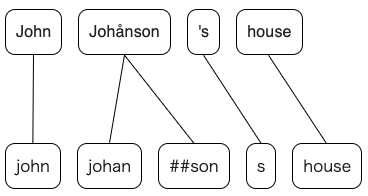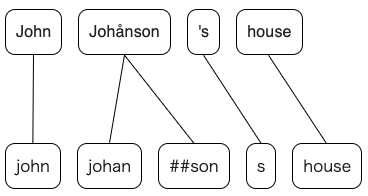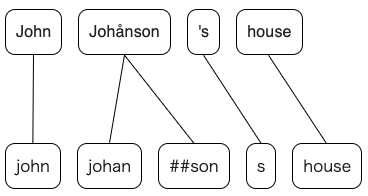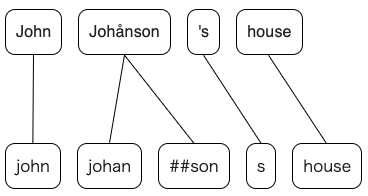

### Submission

##### Read file and prepare data

In [ ]:
#del prep_submission
#prep_submission = pd.read_csv('../input/nbme-score-clinical-patient-notes/sample_submission.csv')
prep_submission = pd.read_csv('../input/nbme-score-clinical-patient-notes/test.csv')
# prep_submission=train
# prep_submission=train.sample(500)
# prep_submission=prep_submission.reset_index()

Get the results

In [ ]:
prep_submission.head()

In [ ]:
prep_submission = prep_submission.merge(features, on=['feature_num', 'case_num'], how='left')
prep_submission = prep_submission.merge(patient_notes, on=['pn_num', 'case_num'], how='left')
display(prep_submission.head(10))

In [ ]:
prep_submission.pn_history=prep_submission.pn_history.astype(str)

In [ ]:
#this will take forever for submit dataset
#prep_submission['location']=prep_submission.apply(lambda x: get_spans(x['feature_num'], x['pn_history']), axis=1)

In [ ]:
import time

### batch vs loop


In [ ]:
prep_submission['location']=''
import re
def extract_numbers(x):
    sentence = x
    s = [float(s) for s in re.findall(r'-?\d+\.?\d*', sentence)]
    return int(s[0])
pn_num_old=50000
start_time = time.perf_counter()
for i in range(len(prep_submission)):
    feature=prep_submission['feature_num'][i]
    #feature_number=prep_submission.feature_num[i]
    #print("pas 1")
    if i==0:
        same_pn_num=False
        #print('iteratia 0 finalizata')
    if pn_num_old==prep_submission.pn_num[i]:
        same_pn_num=True
        #text=("am ales continuare")
        #print("continuare")
    else:
        same_pn_num=False
    pn_num_old=prep_submission.pn_num[i]
    #print(prep_submission.pn_num[i])
    NBME_text=prep_submission.pn_history[i]
   # print(text)
    if same_pn_num==False:
        #print("iteratie noua")
        token_list=[tokenizer.decode([i]) for i in tokenizer.encode(NBME_text)]
        offset_mapping=tokenizer(NBME_text, return_offsets_mapping = True)['offset_mapping']
        predicted_text=predictor.predict(NBME_text)
        text, labels = zip(*predicted_text)
        predicted_df=pd.DataFrame()
        predicted_df['text']=text
        predicted_df['labels']=labels
        predicted_df['id']=predicted_df.index
        predicted_df = predicted_df.rename({'id':'keyRight'}, axis=1)
        #display(predicted_df.head(20))
        predicted_df=predicted_df.dropna()
        predicted_df=predicted_df[predicted_df['labels']!='O']
        predicted_df['feature']=predicted_df['labels'].apply(lambda x: extract_numbers(x))
        predicted_df_temp=pd.DataFrame()
        predicted_df_temp=predicted_df
        predicted_df=predicted_df[predicted_df['feature']==feature]
        #display(predicted_df.head(20)
        a2b, b2a = tokenizations.get_alignments(token_list, text)
        align_df=pd.DataFrame()
        align_df['tokens']=token_list
        align_df['offset']=offset_mapping
        align_df['a2b']=a2b
        align_df = align_df.rename({'a2b':'keyLeft'}, axis=1)
        align_df['keyLeftint']=align_df.keyLeft.str[0]
        align_df=align_df.dropna()
        align_df['keyLeftint']=align_df['keyLeftint'].astype(int)
        align_df=align_df.merge(predicted_df, left_on='keyLeftint', right_on='keyRight')
        #display(align_df.tail(20))
        data=''
        # Merged intervals
        offset_list=align_df.offset
        offset_list=merge_intervals(offset_list)
        for j in range(len(offset_list)):
            data += str(str(offset_list[j][0])+" "+str(offset_list[j][1])+";")
        data=data[:-1] 
## Discrete Intervals
#         for j in range(len(align_df)):
#             data += str(str(align_df.offset[j][0])+" "+str(align_df.offset[j][1])+";")
#         data=data[:-1]   
        prep_submission['location'][i]=data
    else:
        
        predicted_df=predicted_df_temp[predicted_df_temp['feature']==feature]
        #display(predicted_df.head(20)
        a2b, b2a = tokenizations.get_alignments(token_list, text)
        align_df=pd.DataFrame()
        align_df['tokens']=token_list
        align_df['offset']=offset_mapping
        align_df['a2b']=a2b
        align_df = align_df.rename({'a2b':'keyLeft'}, axis=1)
        align_df['keyLeftint']=align_df.keyLeft.str[0]
        align_df=align_df.dropna()
        align_df['keyLeftint']=align_df['keyLeftint'].astype(int)
        align_df=align_df.merge(predicted_df, left_on='keyLeftint', right_on='keyRight')
        #display(align_df.tail(20))
        data=''
###Merged intervals
        offset_list=align_df.offset
        offset_list=merge_intervals(offset_list)
        for j in range(len(offset_list)):
            data += str(str(offset_list[j][0])+" "+str(offset_list[j][1])+";")
        data=data[:-1] 
## Discrete Intervals
#         for j in range(len(align_df)):
#             data += str(str(align_df.offset[j][0])+" "+str(align_df.offset[j][1])+";")
#         data=data[:-1]   
        prep_submission['location'][i]=data
stop_time = time.perf_counter()
print(f"loop for 5 elements {stop_time - start_time:0.4f} seconds")

In [ ]:
offset_list

In [ ]:
prep_submission.head()

In [ ]:
len(prep_submission)

In [ ]:
prep_submission.head(100)

In [ ]:
prep_submission[['id', 'location']].to_csv('submission.csv', index=False)

In [ ]:
submission=prep_submission[['id', 'location']]

In [ ]:
submission.head()

To do token alignment
https://gist.github.com/tamuhey/af6cbb44a703423556c32798e1e1b704

In [ ]:
prep_submission.head()

In [ ]:
prep_submission['location_list']=prep_submission.location.str.replace(';', ' ', regex=True)

In [ ]:
prep_submission['location_list'] = prep_submission.location_list.apply(lambda x: x.split(' '))

In [ ]:
prep_submission.head(2)

View results

In [ ]:
def get_document(i,prep_submission):
    nlp = spacy.blank('en')
    textul=prep_submission.pn_history[i]
    raw_text = "The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
    doc = nlp.make_doc(textul)
    location_list=prep_submission.location_list[i]
    spans=[]
    j=0
    for elem in range(len(location_list)):
        if j<len(location_list):
            code_is=prep_submission.feature_num[i]
            start_pos=int(location_list[j])
            end_pos=int(location_list[j+1])
            new_span=[int(start_pos),int(end_pos),str("B-NBME"+str(code_is))]
    #             new_ent=Span.char_span(doc, start_pos, end_pos, code_is)
    #             new_ents.append(new_ent)
            #span=doc.char_span(int(start_pos), int(end_pos), str(code_is))
            #print(spans)
            j=j+2
            spans.append(new_span)

    ents = []
    for span_start, span_end, label in spans:
        ent = doc.char_span(span_start, span_end, label=label)
        if ent is None:
            continue

        ents.append(ent)

    doc.ents = ents
    return doc


In [ ]:
options=get_entity_options()

In [ ]:
doc=get_document(0,prep_submission)
displacy.render(doc, style="ent", jupyter=True,options=options)

In [ ]:
doc=get_document(0,prep_submission)
displacy.render(doc, style="ent", jupyter=True,options=options)

In [ ]:
doc=get_document(1,prep_submission)
displacy.render(doc, style="ent", jupyter=True,options=options)

In [ ]:
doc=get_document(2,prep_submission)
displacy.render(doc, style="ent", jupyter=True,options=options)

In [ ]:
doc=get_document(3,prep_submission)
displacy.render(doc, style="ent", jupyter=True,options=options)

In [ ]:
doc=get_document(4,prep_submission)
displacy.render(doc, style="ent", jupyter=True,options=options)

In [ ]:
# for i in range(10):
    
#     try:
#         print("=============================================================")
#         print("Document no:",i,"Patient history:",prep_submission.pn_num[i],"feature no:",prep_submission.feature_num[i])
#         print("=============================================================")
#         doc=get_document(i,prep_submission)
#         displacy.render(doc, style="ent", jupyter=True,options=options)
#     except:
#         print("no more data")